# Erdmagnetfeld

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import linecache

In [150]:
class Oszi:
    def __init__(self,path):
        '''Path ohne Endung angeben.'''
        data = np.genfromtxt(path).T
        self.path = path
        self.scope = path + '_ScopeSettings.txt'
        self.time = data[0]
        self.ch1 = data[1]
        self.ch2 = data[2]

    def plot(self,xlabel=None,ylabel1=None,ylabel2=None,title=None,figsize=(8,5),ScopeSettings=False):
        '''ScopeSettings gibt an, ob Oszi-Fenster wie im Praktikum dargestellt werden soll.'''
        fig, ax1 = plt.subplots(figsize=figsize)
        ax2 = ax1.twinx()
        if ScopeSettings == True:
            '''Bin mir nicht ganz sicher, ob das so passt. Wahrscheinliche automatische Anpassung besser'''
            offset1 = float(linecache.getline(self.scope,3).split()[1])
            # scale1 = float(linecache.getline(self.scope,2).split()[1])
            offset2 = float(linecache.getline(self.scope,11).split()[1])
            # scale2 = float(linecache.getline(self.scope,10).split()[1])
            print(offset1)
            print(offset2)
            ax1.plot(self.time,self.ch1+offset1,label='Channel 1',color='blue')
            ax2.plot(self.time,self.ch2+offset2,label='Channel 2',color='red')
            ax1.legend(loc=2)
            ax2.legend(loc=3)
            ax1.tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='red')
        else:
            ax1.plot(self.time,self.ch1,label='Channel 1',color='blue')
            ax2.plot(self.time,self.ch2,label='Channel 2',color='red')
            ax1.legend(loc=2)
            ax2.legend(loc=3)
            ax1.tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='red')
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel1,c='blue')
        ax2.set_ylabel(ylabel2,c='red')
        plt.title(title)

def helmholtz(N,r,I):
    '''Rückgabe der magnetischen Flussdichte'''
    return (4/5)**(3/2)*N/r*I

R = 1/0.5806117775757463
N = 160
r = 9e-2

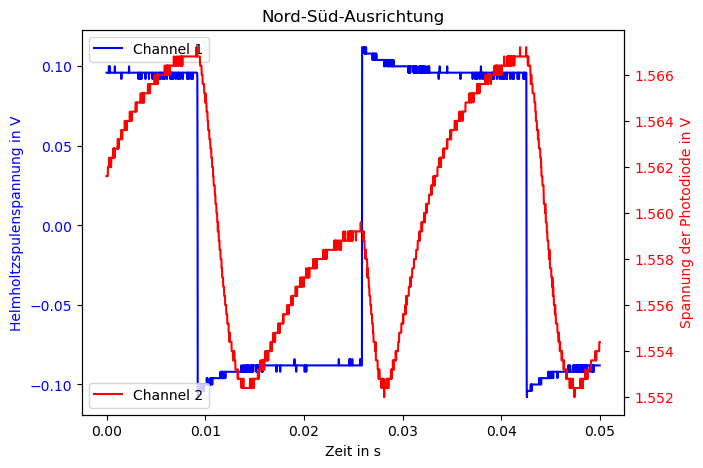

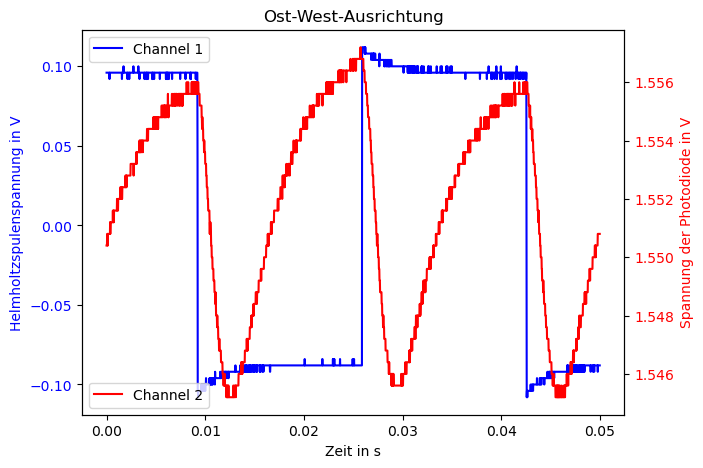

In [151]:
nordsüd = Oszi('data/ohne_B/erdmagnet/nord_sued')
ostwest = Oszi('data/ohne_B/erdmagnet/ost_west')
nordsüd.plot(title='Nord-Süd-Ausrichtung',xlabel='Zeit in s',ylabel1='Helmholtzspulenspannung in V',ylabel2='Spannung der Photodiode in V',figsize=(7,5))
plt.savefig('figures/nordsüd.pdf')
# nordsüd.plot(title='Nord-Süd-Ausrichtung',xlabel='Zeit in s',ylabel1='Helmholtzspulenspannung in V',ylabel2='Spannung der Photodiode in V',ScopeSettings=True)
ostwest.plot(title='Ost-West-Ausrichtung',xlabel='Zeit in s',ylabel1='Helmholtzspulenspannung in V',ylabel2='Spannung der Photodiode in V',figsize=(7,5))
plt.savefig('figures/ostwest.pdf')

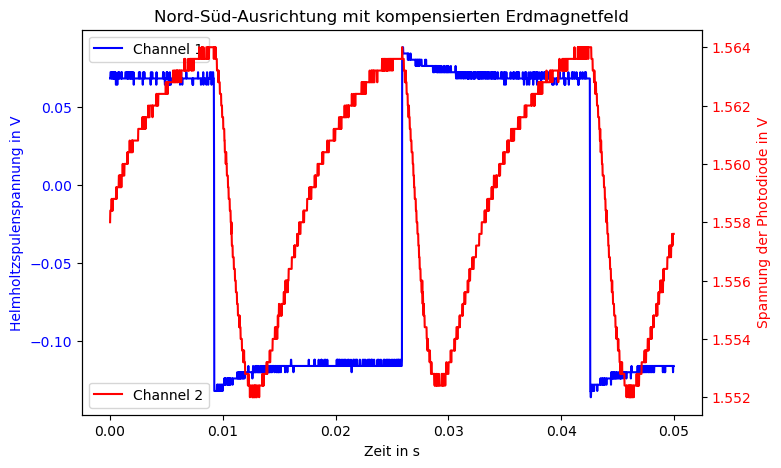

In [152]:
nordsüdkomp = Oszi('data/ohne_B/erdmagnet/nord_sued_kompensiert')
nordsüdkomp.plot(title='Nord-Süd-Ausrichtung mit kompensierten Erdmagnetfeld',xlabel='Zeit in s',ylabel1='Helmholtzspulenspannung in V',ylabel2='Spannung der Photodiode in V',figsize=(8,5))
plt.savefig('figures/nordsüdkomp.pdf')

In [153]:
U_offset = -25.8e-3
dU_offset = 4.5e-3
I = U_offset/R*0.5   # Faktor 1/2, weil Strom, der in die Formel eingeht, der Strom durch eine (nicht die zwei parallelen Spulen) ist.
H = helmholtz(N,r,I)
B = H*const.mu_0
print(H)
print('Erdmagnetfeld: ',B)
dI = dU_offset/R*0.5   # Faktor 1/2, weil Strom, der in die Formel eingeht, der Strom durch eine (nicht die zwei parallelen Spulen) ist.
dH = helmholtz(N,r,dI)
dB = dH*const.mu_0
print('Fehler: ',dB)

-9.527698489590332
Erdmagnetfeld:  -1.1972859038723956e-05
Fehler:  2.0882893672192943e-06
